# 海森堡不确定性原理

## 1 背景知识

### 1.1 位置与动量的不确定性关系

海森堡不确定性原理是量子力学中一个十分著名的结论，其最早于上世纪三十年代被海森堡提出。不确定性原理最初的表述为不可能同时精确确定一个粒子的位置和动量，也曾被译为测不准原理，但实际上该原理与测量的实验水平无关，而是由位置算符与动量算符的对易关系决定的，其数学表述为 $\Delta x \Delta p \geq \frac{\hbar}{2}$。后来不确定性原理得到了推广，任意两个厄米算子之间均存在不确定性关系。

### 1.2  广义海森堡不确定性原理

设 $A$ 和 $B$ 为两个厄米算子（即满足 $A=A^\dagger$，$B=B^\dagger$），$\langle A \rangle$ 为 $A$ 在某个归一化态 $|\psi\rangle$ 下的期望值。则 $A$ 的不确定度 $\Delta A$ 定义为：
$$ \Delta A=\langle (A - \langle A \rangle )^2 \rangle ^{1/2}=
( \langle A^2 \rangle - \langle A \rangle^2 ) ^{1/2}.$$
类似地，我们可以定义 $B$ 的期望值及其不确定度。数学上可以证明，
$$\Delta A \Delta B \geq \frac{1}{2} |\langle [A,B] \rangle|. $$
这就是广义的海森堡不确定原理，其中 $[A,B]=AB-BA$ 是 $A$ 和 $B$ 的对易子。  
对于位置算符 $x$ 与动量算符 $p$，其对易关系为 $[x,p]=i \hbar$，因此有 $\Delta x \Delta p \geq \frac{1}{2} |\langle [x,p] \rangle| = \frac{\hbar}{2}$，此即为之前提到的位置与动量的不确定性关系。

### 1.3 $\sigma_X$ 和 $\sigma_Y$ 的不确定性关系

设三个量子逻辑门 $X$,$Y$,$Z$ 分别对应三个泡利矩阵 $\sigma_X$,$\sigma_Y$,$\sigma_Z$，则 $X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}$,$Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}$,$Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$。由于 $[\sigma_X,\sigma_Y]=2i\sigma_Z$，根据不确定性原理，应有 $\Delta X \Delta Y \geq \ |\langle Z \rangle |$。  
更具体地，设量子态 $|\psi \rangle=cos \frac{\theta}{2}|0 \rangle + e^{i\phi}sin\frac{\theta}{2}|1 \rangle $，则可计算出
$$ \langle \psi |X| \psi \rangle = sin \theta cos \phi, \langle \psi |Y| \psi \rangle = sin \theta sin \phi, \langle \psi |Z| \psi \rangle = cos \theta , \langle \psi |X^2| \psi \rangle = \langle \psi |Y^2| \psi \rangle = 1,$$
$$ [ \Delta (X) \Delta (Y) ]^2-| \langle Z \rangle|^2=(1-{sin}^2 \theta {cos}^2 \phi)(1- {sin}^2 \theta {sin}^2 \phi)-{cos}^2 \theta={cos}^2 \phi {sin}^2 \phi {sin}^4 \theta \geq 0. $$
上述公式反映了 $\sigma_X$ 与 $\sigma_Y$ 的不确定性关系，下面将设计相应算法并用 PyQuafu 对此关系进行演示与验证。

## 2 算法逻辑

构造量子电路，将量子比特从 $|0\rangle$ 旋转为 $|\psi\rangle=cos \frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $。旋转测量基，分别以 $X$,$Y$,$Z$ 算子的本征态为基进行测量，根据测量结果求出对应算子的期望，并计算 $[ \Delta (X) \Delta (Y) ]^2-| \langle Z \rangle|^2$ 的值（由于 $X^2=Y^2=I$，因此直接代入 $\langle X^2 \rangle=\langle Y^2 \rangle=1$）。若计算结果大于0，则说明不确定性关系成立，同时可进一步与理论值比较。改变 $\theta$ 与 $\phi$ 的值，重复前述步骤，可对不同的量子态 $|\psi\rangle$ 进行演示。

## 3 PyQuafu实现

### 3.1 构造量子电路

定义一个函数来构造一个3-量子比特的电路，其先将每个量子比特从 $|0\rangle$ 旋转为 $|\psi\rangle=cos \frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $，再将前两个量子比特进行旋转，使三个量子比特的测量基分别为 $X$,$Y$,$Z$ 算子的本征态。为了简化问题，我们固定 $\phi$ 为 $\frac{\pi}{4}$ ，只将 $\theta$ 作为可变参量。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quafu import QuantumCircuit, simulate, Task
from numpy import pi, cos, sin

def construct_circuit(theta):
    qc = QuantumCircuit(3)
    for i in range(3):  # 创建一个3量子比特的电路, 量子态: |0> --> |ψ> = cos(θ/2)|0> + exp(i*pi/4)*sin(θ/2)|1>
        if theta != 0:
            qc.ry(i, theta)
        qc.rz(i, pi/4)
    qc.barrier([0,1,2])
    qc.ry(0, -pi/2)   # 转化测量基为X的本征态
    qc.rx(1, pi/2)    # 转化测量基为Y的本征态
    qc.measure([0,1,2])
    return qc

以 $\theta = \frac{\pi}{2}$ 为例，绘制量子电路图。

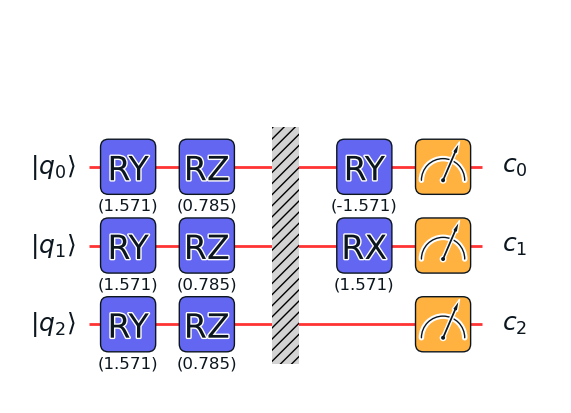

In [2]:
q = construct_circuit(pi/2)
q.plot_circuit()

### 3.2 创建演示任务

定义用于创建演示任务的函数。它有 `theta_num` 与 `experimental` 两个参数。 `theta_num` 用于确定取多少个 $\theta$ 的值， `experimental` 用于选择在真机上运行或用模拟器模拟。该函数将在区间 $[0，\pi)$ 中均匀地取 `theta_num` 个 $\theta$ 值进行测量，并将测得期望值 $E(X)$、$E(Y)$ 和 $E(Z)$ 放在 `obsexp` 中。    
该函数有三个返回参数，`theta`、 `obsexp`、 `experimental`，分别表示取的 $\theta$ 值，对应的三个期望以及它是在真机还是模拟器上运行。此外，如果选择在真机上运行，该函数会显示任务的 `taskid` ，可以将其保存以便之后查看。

In [3]:
def uncertainty_principle_demo(theta_num = 10, experimental = False):
    theta_step = pi/theta_num  
    theta = []  # 保存θ的值
    obsexp = []  # 保存 EX,EY,EZ
    name = ["θ={:.3f}*pi".format(i*theta_step/pi)  for i in range(theta_num)]  # 每个任务的名字
    groupname = "uncertainty_principle"  # 任务组的名字
    task = Task()  # 创建并配置Task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
    for i in range(theta_num):
        theta_i = i*theta_step
        qc = construct_circuit(theta = theta_i)
        sub_obsexp=[] # 保存此次循环中 EX,EY,EZ 的值
        if experimental:
            sub_res = task.send(qc, name=name[i], group=groupname)
            for i in range(3):
                sub_obsexp.append(sub_res.calculate_obs([i]))
            print("θ= {:.3f}*pi ".format(theta_i/pi),"E(X) = {0:.5f}, E(Y) = {1:.5f}, E(Z) = {2:.5f}".format(*sub_obsexp))
        else:
            simu_res = simulate(qc)
            for i in range(3):
                sub_obsexp.append(simu_res.calculate_obs([i]))
        theta.append(theta_i)
        obsexp.append(sub_obsexp)
    if experimental:
        history=task.get_history()
        print("","任务id：",history,"",sep="\n")  # 保存任务id以便下次查询
    return theta,obsexp,experimental

## 4 展示运行结果

为了显示理论曲线，我们在区间 $[0,\pi)$ 内均匀取 100 个 $\theta$ 值，并计算 $[ \Delta (X) \Delta (Y) ]^2-| \langle Z \rangle|^2$ 的理论值 ${cos}^2 \phi {sin}^2 \phi {sin}^4 \theta$。

In [4]:
def theoretical_value(theta, phi = pi/4):
    return (sin(phi)**2)*(cos(phi)**2)*(sin(theta)**4)  # [Δ(X)Δ(Y)]^2-|<Z>|^2
x = np.linspace(0, pi, 100)
y = theoretical_value(x)

In [5]:
def plot_theoretical_value(x,y):
    plt.plot(x, y, label="Theoretical value: sin(φ)^2*cos(φ)^2*sin(θ)^4")
    plt.xlabel("theta")
    plt.ylabel("(Δ(X)Δ(Y))^2-|<Z>|^2")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

### 4.1 在模拟器上运行的结果

通过调用 `uncertainty_principle_demo` 函数并将 `experimental` 参数设置为 False，我们可以得到在模拟器上运行的结果，然后可以使用 matplotlib 中的函数将其可视化。

θ= 0.000*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.000000
θ= 0.100*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.002280
θ= 0.200*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.029841
θ= 0.300*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.107095
θ= 0.400*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.204534
θ= 0.500*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.250000
θ= 0.600*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.204534
θ= 0.700*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.107095
θ= 0.800*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.029841
θ= 0.900*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.002280


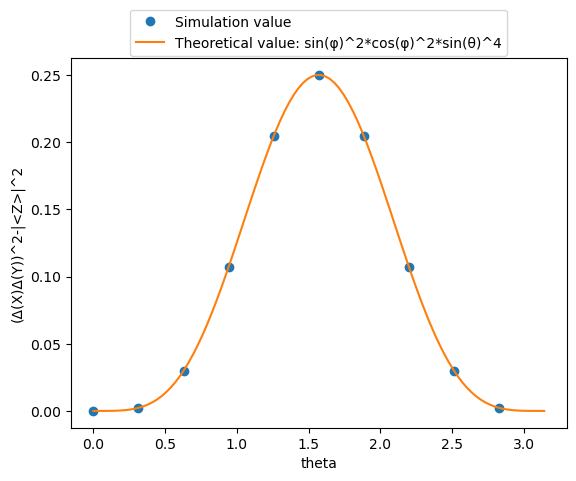

In [6]:
theta, obsexp, experimental = uncertainty_principle_demo(theta_num = 10, experimental = False)
res=[(1-obsexp[i][0]**2)*(1-obsexp[i][1]**2)-obsexp[i][2]**2 for i in range(len(obsexp))]  # [Δ(X)Δ(Y)]^2-|<Z>|^2
for i in range(len(res)):
    print("θ= {:.3f}*pi ".format(theta[i]/pi),"[Δ(X)Δ(Y)]^2-|<Z>|^2 = {:.6f}".format(res[i]))  # 展示结果数据
# 展示结果图
plt.plot(theta, res, "o",label="Simulation value")
plot_theoretical_value(x,y)
plt.show()

### 4.2 在真机上运行的结果

将 `experimental` 参数设置为 True，我们可以得到在真机上运行的结果，同时所运行任务的 `taskid` 也将显示。

θ= 0.000*pi  E(X) = -0.05400, E(Y) = 0.00800, E(Z) = 0.98800
θ= 0.100*pi  E(X) = 0.25100, E(Y) = 0.21200, E(Z) = 0.94700
θ= 0.200*pi  E(X) = 0.40400, E(Y) = 0.44100, E(Z) = 0.77800
θ= 0.300*pi  E(X) = 0.54900, E(Y) = 0.57100, E(Z) = 0.59900
θ= 0.400*pi  E(X) = 0.66300, E(Y) = 0.66200, E(Z) = 0.29500
θ= 0.500*pi  E(X) = 0.69600, E(Y) = 0.69700, E(Z) = 0.01100
θ= 0.600*pi  E(X) = 0.64700, E(Y) = 0.67600, E(Z) = -0.25100
θ= 0.700*pi  E(X) = 0.51300, E(Y) = 0.51300, E(Z) = -0.57400
θ= 0.800*pi  E(X) = 0.38500, E(Y) = 0.38200, E(Z) = -0.77400
θ= 0.900*pi  E(X) = 0.18700, E(Y) = 0.26900, E(Z) = -0.89200

任务id：
{'uncertainty_principle': ['2F9BFCF00248136E', '2F9BFD7029E91484', '2F9BFDF012C9B142', '2F9BFE603687EA45', '2F9BFEE01F3D0E16', '2F9BFF6006B233F0', '2F9BFFD02D662D57', '2F9C005014EAD008', '2F9C00D03A60EA6D', '2F9C01501F474B2E']}

θ=0.000*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.020876
θ=0.100*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = -0.001922
θ=0.200*pi  [Δ(X)Δ(Y)]^2-|<Z>|^2 = 0.068761
θ=0.300*pi  [Δ(X)Δ(Y)]^2-|

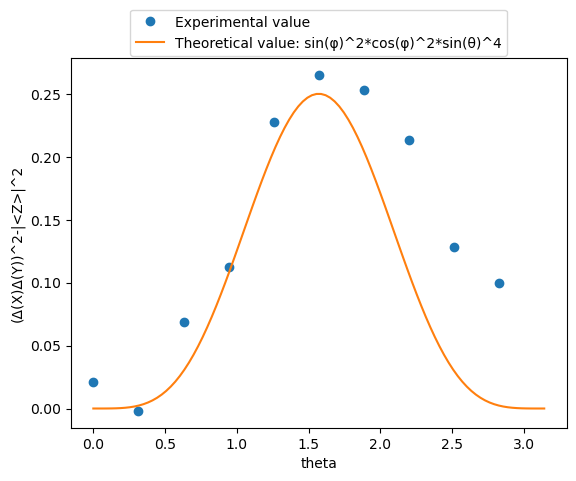

In [7]:
theta, obsexp, experimental = uncertainty_principle_demo(theta_num = 10, experimental = True)
res=[(1-obsexp[i][0]**2)*(1-obsexp[i][1]**2)-obsexp[i][2]**2 for i in range(len(obsexp))]  # [Δ(X)Δ(Y)]^2-|<Z>|^2
for i in range(len(res)):
    print("θ={:.3f}*pi ".format(theta[i]/pi),"[Δ(X)Δ(Y)]^2-|<Z>|^2 = {:.6f}".format(res[i]))  # 展示结果数据
# 展示结果图
plt.plot(theta, res, "o",label="Experimental value")
plot_theoretical_value(x,y)
plt.show()